# Constant Likelihood

Managing plateaus in nested sampling is tricky because the measure of enclosed prior volume is assumed to be monotonically decreasing. In this simple model, the model is simply,

$L(x) = P(y | x) = 1$

and

$P(x) = \mathcal{U}[x \mid 0, 1]$.

The analytic evidence for this model is,

$Z = P(y) = \int_\mathcal{X} L(x) p(x) \,\mathrm{d} x = 1$

## Overview

We'll cover the following topics:

1. Show how likelihood plateaus are handled in JAXNS.

In [1]:

from jaxns.nested_sampler.nested_sampling import NestedSampler, save_results, load_results
from jaxns.prior_transforms import PriorChain, UniformPrior
from jaxns.utils import summary, marginalise_dynamic
from jaxns.plotting import plot_cornerplot, plot_diagnostics
from jax.scipy.linalg import solve_triangular
from jax import random, jit
from jax import numpy as jnp
from timeit import default_timer

In [2]:
# A PriorChain holds the definition of your prior. A number of priors are provided, and really complex ones are easy to implement.

# Simple use a PriorChain context like so to define your prior RVs.
with PriorChain() as prior_chain:
    UniformPrior('x', 0., 1.)

# The likelihood is a constant.
def log_likelihood(x):
    return 0.


true_logZ = 0.

print("True logZ={}".format(true_logZ))

INFO[2022-03-03 01:37:30,850]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-03-03 01:37:30,851]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Host Interpreter
INFO[2022-03-03 01:37:30,851]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
WARNING[2022-03-03 01:37:30,852]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


True logZ=0.0


In [3]:
# Create the nested sampler class. In this case without any tuning.
ns = NestedSampler(log_likelihood, prior_chain)
# We jit-compile
ns = jit(ns)
# We run, with any parameters desired. In this case, without any tuning.
results = ns(random.PRNGKey(42))


In [4]:
# We can use the summary utility to display results
summary(results)

--------
Termination Conditions:
--------
# likelihood evals: 100
# samples: 100
# likelihood evals / sample: 1.0
--------
logZ=-0.015 +- 0.011
H=1.0
ESS=50
--------
x: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.
x: 0.53 +- 0.25 | 0.19 / 0.49 / 0.87 | 0.85 | 0.15
--------


'--------\nTermination Conditions:\n--------\n# likelihood evals: 100\n# samples: 100\n# likelihood evals / sample: 1.0\n--------\nlogZ=-0.015 +- 0.011\nH=1.0\nESS=50\n--------\nx: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.\nx: 0.53 +- 0.25 | 0.19 / 0.49 / 0.87 | 0.85 | 0.15\n--------'

WARNING[2022-03-03 01:38:03,696]: No handles with labels found to put in legend.


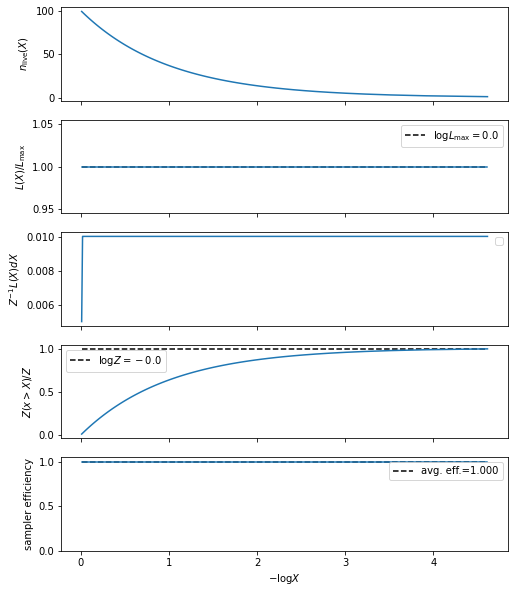

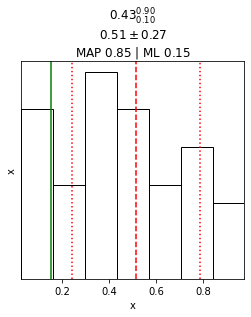

In [5]:
# We plot useful diagnostics and a distribution cornerplot.
plot_diagnostics(results)
plot_cornerplot(results)